*For both the Americans and Canadians there appears to be a yearly seaonality*

**Seasonality**

We can group the data by month and see the variation over the entire record.

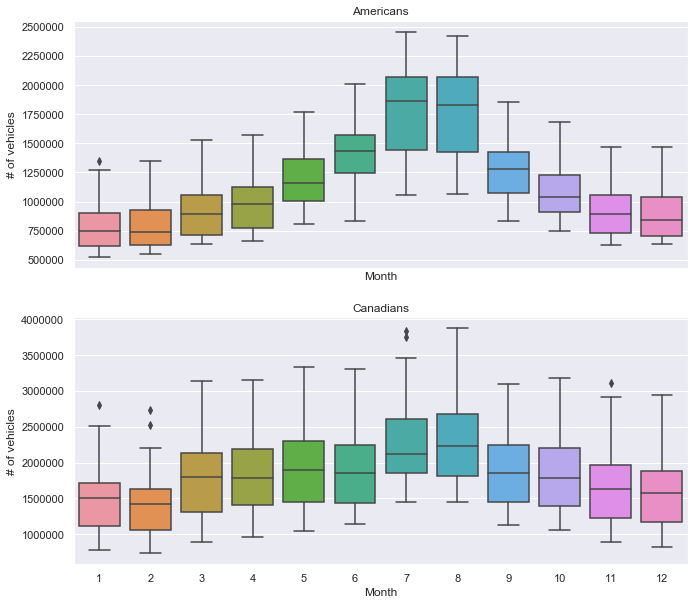

In [29]:
# Group date by month, to visualize yearly seasonality

# create 3 subplots in 1 column, of set size and share x-axis
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

# Create a boxplot for each of ['Consumption', 'Solar','Wind']
for name, ax in zip(['Americans','Canadians'], axes):
    sns.boxplot(data=can_crossings, x='Month', y=name, ax=ax)
    ax.set_ylabel('# of vehicles')
    ax.set_title(name)
    
# Remove the auto x-axis label form all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

*The 'Americans' show a gradually increasing trend in visits peaking in July and August. This pattern is well represented across the entire record. The 'Canadians' have a low season between November and February, followed by a step increase in visits between March and June as well as September and October. Like the 'Americans' the peak in visits takes pace in July and August.*

## Trends

We can use a yearly rolling window to smooth out the montly seasonality so that we can see other trends in the data.

In [30]:
# min_periods argument accounts for missing data
can_crossings_365d = can_crossings[['Americans','Canadians']].rolling(window=12, 
                                             center=True,
                                            min_periods=10).mean()

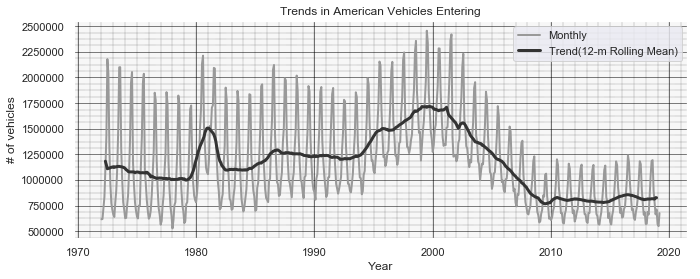

In [31]:
#Plot monthly and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(can_crossings['Americans'],
       color='0.6',
       linewidth=2,
       label='Monthly')

ax.plot(can_crossings_365d['Americans'],
       color='0.2',
       linewidth=3,
       label='Trend(12-m Rolling Mean)')

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Set major x-ticks to decadal intergal and minor x-ticks to yearly intergal
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_minor_locator(mdates.YearLocator())

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.4', color='black')

# Add legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('# of vehicles')
ax.set_title('Trends in American Vehicles Entering')

# Modify background colour
ax.set_facecolor('#f7f7f7');

*There was an episode of increased crossings centered on 1981. An increasing trend took place from 1994 to 2001, followed by a decreasing trend until 2009 when visits leveled off at numbers lower than previously.*

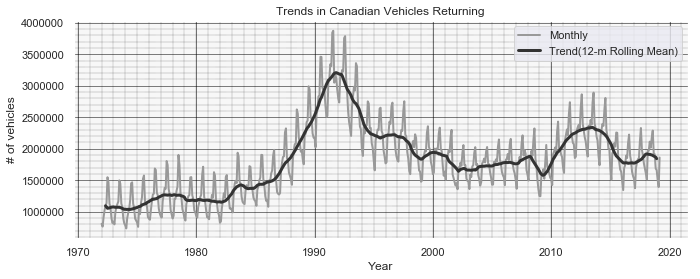

In [32]:
#Plot monthly and 365-day rolling mean time series
fig, ax = plt.subplots()

ax.plot(can_crossings['Canadians'],
       color='0.6',
       linewidth=2,
       label='Monthly')

ax.plot(can_crossings_365d['Canadians'],
       color='0.2',
       linewidth=3,
       label='Trend(12-m Rolling Mean)')

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Set major x-ticks to decadal intergal and minor x-ticks to yearly intergal
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_minor_locator(mdates.YearLocator())

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.4', color='black')

# Add legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('# of vehicles')
ax.set_title('Trends in Canadian Vehicles Returning')

# Modify background colour
ax.set_facecolor('#f7f7f7')

*In the 70s there was a similar number of Canadian crossings as Americans. Starting in 1982 there was an increasing trend that reached its height in 1992. This was followed by a decreasing trend that ended around 2002. The leveling off was at a higher number of vehicles than seen previously. Another increased episode occurred from 2009 to 2015 centered on 2013.*


Americans vs. Canadians

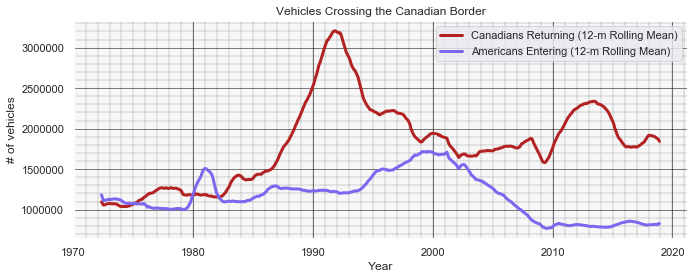

In [38]:
#Plot 365-day rolling mean time series for USA and CAN
fig, ax = plt.subplots()

ax.plot(can_crossings_365d['Canadians'],
       color='#B22222',
       linewidth=3,
       label='Canadians Returning (12-m Rolling Mean)')

ax.plot(can_crossings_365d['Americans'],
       color='#7B68EE',
       linewidth=3,
       label='Americans Entering (12-m Rolling Mean)')

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Set major x-ticks to decadal intergal and minor x-ticks to yearly intergal
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_minor_locator(mdates.YearLocator())

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.4', color='black')

# Add legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('# of vehicles')
ax.set_title('Vehicles Crossing the Canadian Border')

# Modify background colour
ax.set_facecolor('#f7f7f7');

*In general Canadian traffic to the US has almost doubled over the last 50 years. American traffic was also increasing but began a sharp decline in the early 2000s. This decline stabilised in 2010 at a historical low volume.*

## Socio-economic Influences

**Exchange Rate**

Let's compare the trends in border traffic to the historical exhange rate.

*Data source: https://fred.stlouisfed.org/series/EXCAUS#0*

In [64]:
# Bring in the dataset
exchange_df_000 = pd.read_csv('EXCAUS.csv')

In [65]:
print(exchange_df_000.shape)
print(exchange_df_000.info())
print(exchange_df_000.head())
exchange_df_000.tail()

(582, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 2 columns):
DATE      582 non-null object
EXCAUS    582 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.2+ KB
None
         DATE  EXCAUS
0  1971-01-01  1.0118
1  1971-02-01  1.0075
2  1971-03-01  1.0064
3  1971-04-01  1.0077
4  1971-05-01  1.0087


,DATE,EXCAUS
577,2019-02-01,1.3209
578,2019-03-01,1.3371
579,2019-04-01,1.3378
580,2019-05-01,1.3460
581,2019-06-01,1.3392


In [66]:
exchange_df_000['DATE'] = pd.to_datetime(exchange_df_000['DATE'])
exchange_df_000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 2 columns):
DATE      582 non-null datetime64[ns]
EXCAUS    582 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.2 KB


In [67]:
exchange_df_001 = exchange_df_000.set_index(['DATE'])
exchange_df_002 = exchange_df_001.loc['1972-01-01':'2019-03-01']

print(exchange_df_002.head())
print(exchange_df_002.tail())

            EXCAUS
DATE              
1972-01-01  1.0059
1972-02-01  1.0047
1972-03-01  0.9985
1972-04-01  0.9957
1972-05-01  0.9889
            EXCAUS
DATE              
2018-11-01  1.3205
2018-12-01  1.3436
2019-01-01  1.3300
2019-02-01  1.3209
2019-03-01  1.3371


In [70]:
can_crossings_365d['Exchange'] = exchange_df_002['EXCAUS']
can_crossings_365d.head()

,Americans,Canadians,Exchange
REF_DATE,,,
1972-01-01,NaN,NaN,1.0059
1972-02-01,NaN,NaN,1.0047
1972-03-01,NaN,NaN,0.9985
1972-04-01,NaN,NaN,0.9957
1972-05-01,1183645.4,1095146.0,0.9889


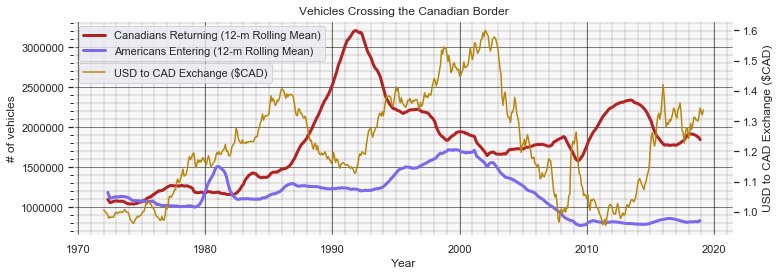

In [95]:
#Plot 365-day rolling mean time series for USA and CAN
fig, ax1 = plt.subplots()

ax1.plot(can_crossings_365d['Canadians'],
       color='#B22222',
       linewidth=3,
       label='Canadians Returning (12-m Rolling Mean)')

ax1.plot(can_crossings_365d['Americans'],
       color='#7B68EE',
       linewidth=3,
       label='Americans Entering (12-m Rolling Mean)')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(can_crossings_365d['Exchange'],
         color = '#B8860B',
        label='USD to CAD Exchange ($CAD)')

ax2.set_ylabel('USD to CAD Exchange ($CAD)')  # we already handled the x-label with ax1

# Turn on the minor TICKS, which are required for the minor GRID
ax1.minorticks_on()

# Set major x-ticks to decadal intergal and minor x-ticks to yearly intergal
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_minor_locator(mdates.YearLocator())

# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax2.grid(which='both', b = None, axis = 'y')

# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.4', color='black')

# Add legend and labels
ax1.legend(loc='upper left')
ax2.legend(loc='upper left',
          bbox_to_anchor=(0,0.83))
ax1.set_xlabel('Year')
ax1.set_ylabel('# of vehicles')
ax1.set_title('Vehicles Crossing the Canadian Border')

# Modify background colour
ax1.set_facecolor('#f7f7f7')

fig.tight_layout();  # otherwise the right y-label is slightly clipped;

*The Canadian traffic seems to be tied to the exchange rate. While the American traffic seems to be also tied to the exchange rate, it hasn't increased post 2013 eventhough there's been an increasingly favourable exchange rate.*